# Diabetes Predictions

In [305]:
# Lets import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

In [261]:
# Extracting Database
df = pd.read_csv('diabetes.csv')

In [262]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [263]:
# Find rows and columns
df.shape

(768, 9)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [265]:
# Lets do some statistcal techniques
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


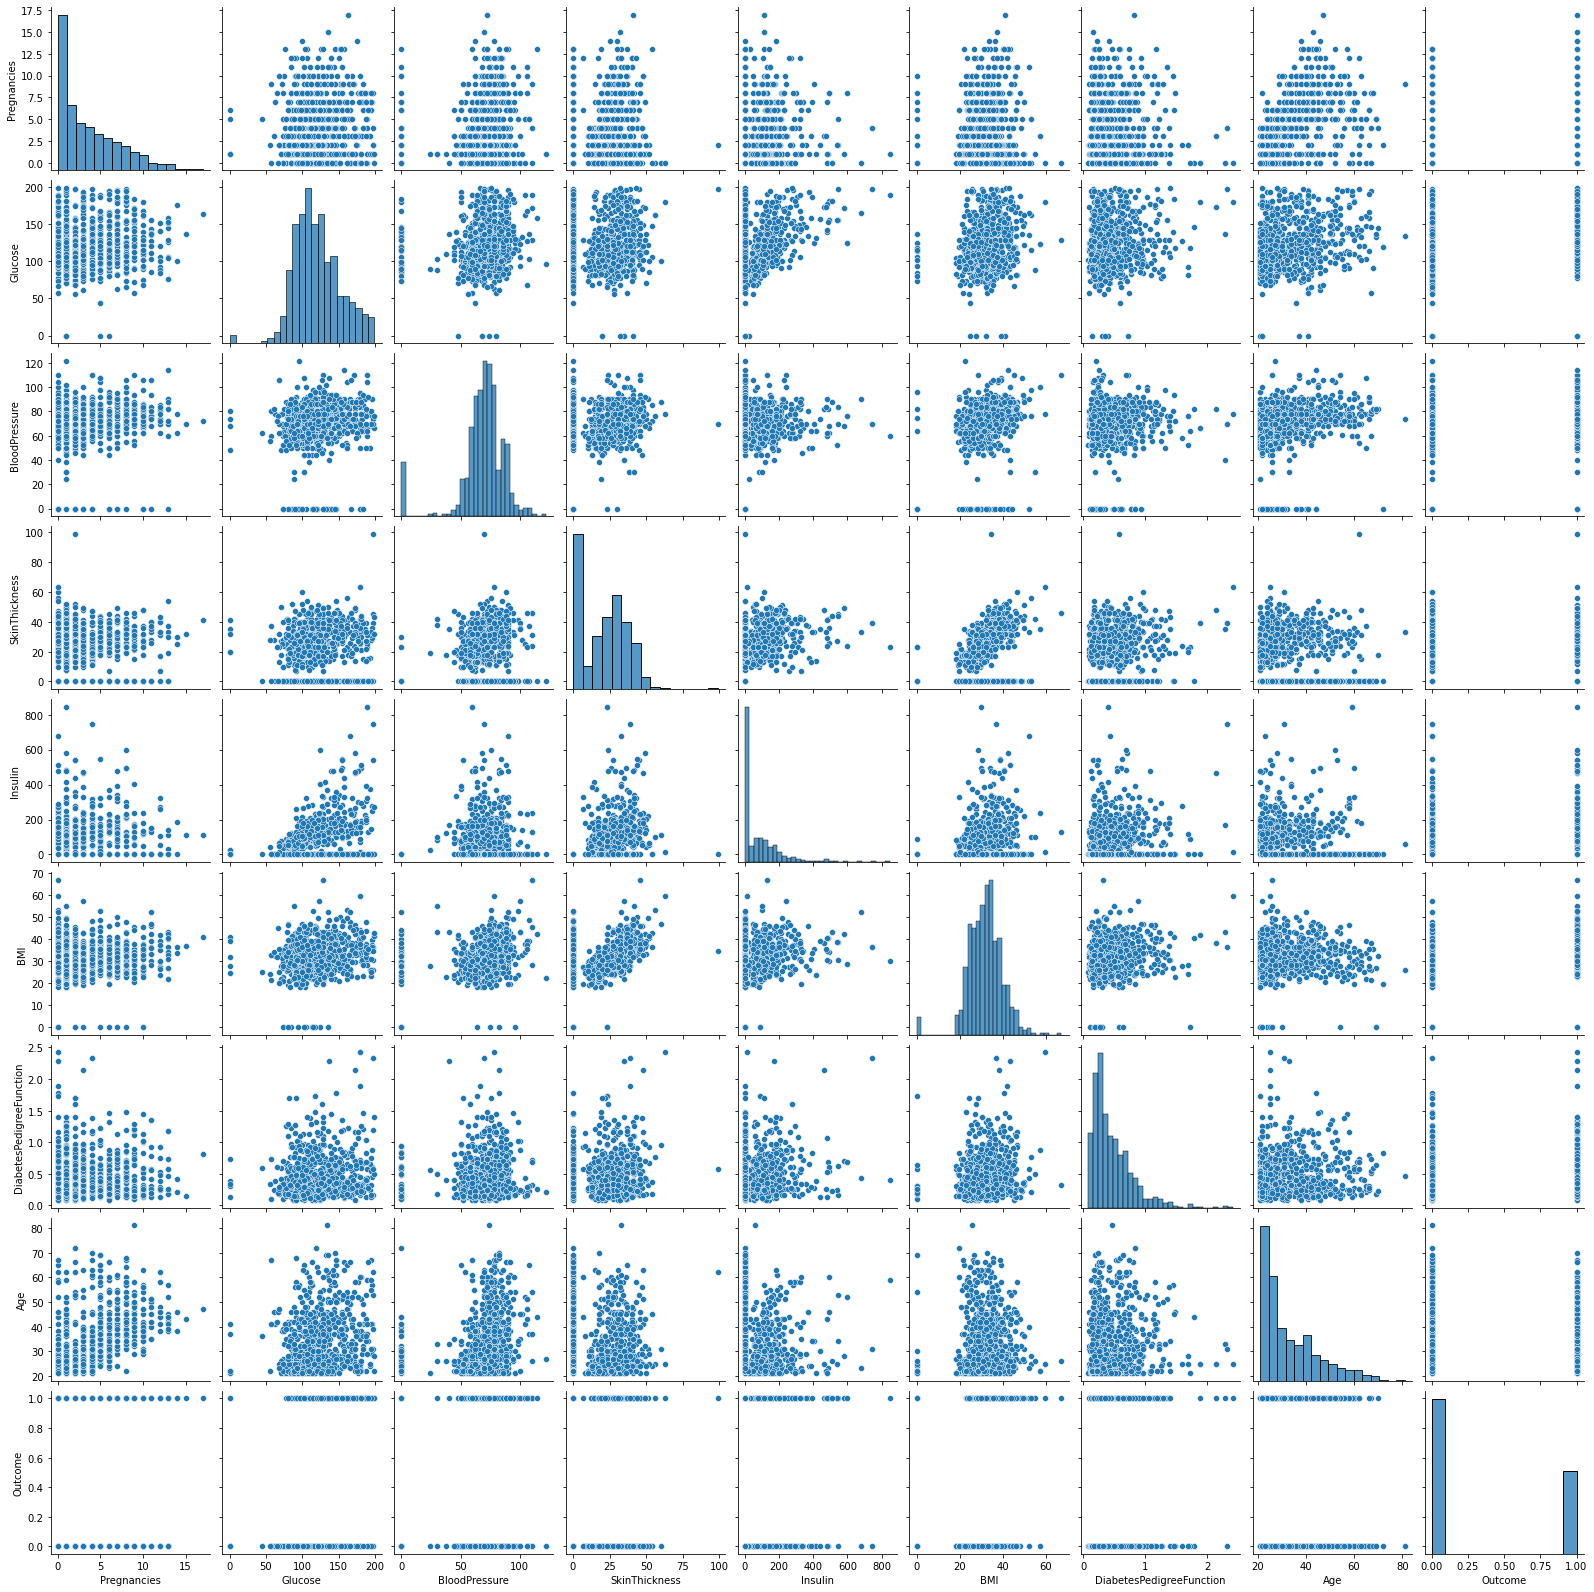

In [289]:
# Using seaborn checking the correlation between the features
sns.pairplot(df)

In [290]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


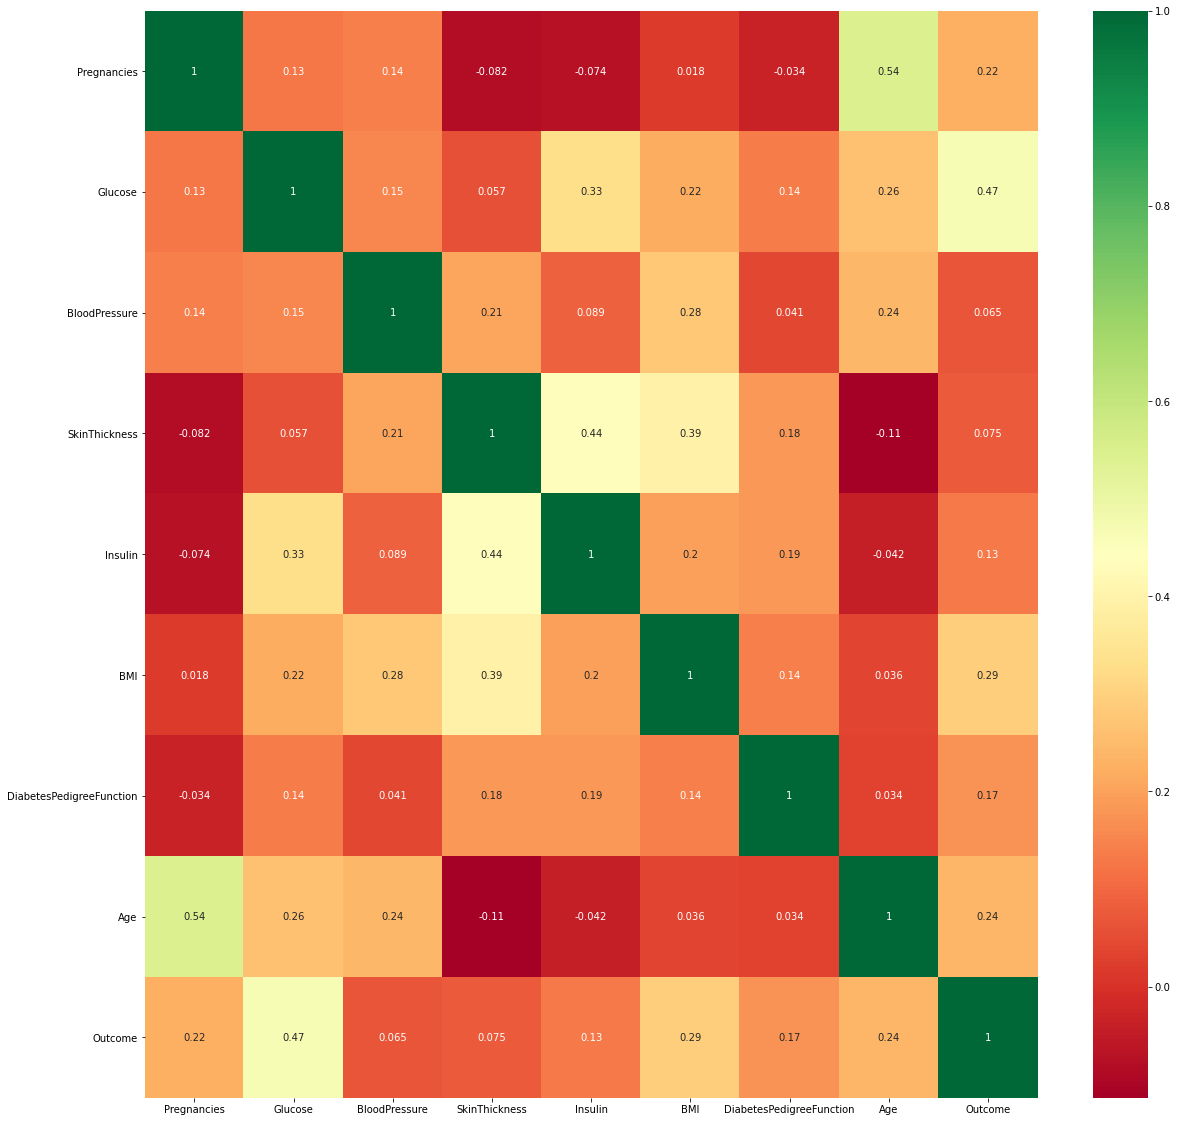

In [291]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Explolatory Data Analysis

<AxesSubplot:title={'center':'NULL values Find'}>

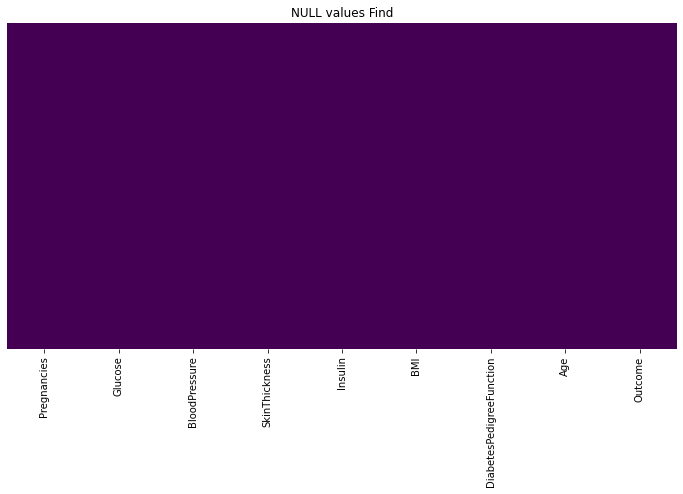

In [295]:
## Check for NULL values
plt.figure(figsize=(12,6))
p = plt.title('NULL values Find')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [266]:
# Find NULL values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

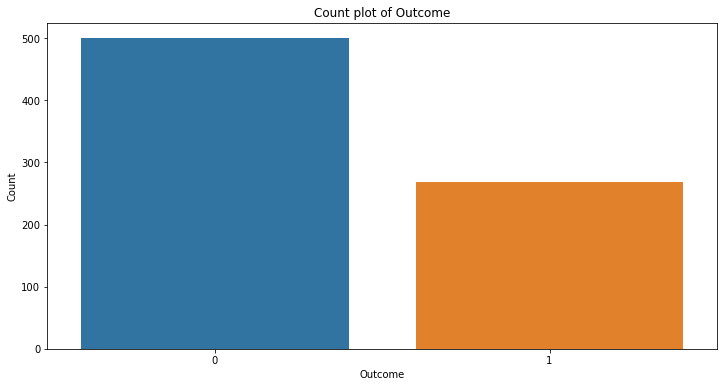

In [296]:
# Visualizing 'Outcome' Features
plt.figure(figsize=(12,6))
g = sns.countplot(x='Outcome', data=df)
p = plt.title('Count plot of Outcome')
p = plt.ylabel('Count')

In [268]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Note**: As we seen here dependent value contains imbalanced dataset 

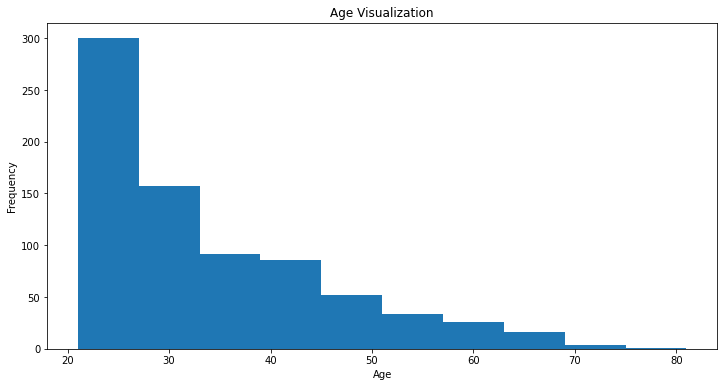

In [299]:
# Plot the 'Age' dataset
plt.figure(figsize=(12,6))
p = plt.title('Age Visualization')
g = df['Age'].plot(kind='hist')
p = plt.xlabel('Age')

In [270]:
# Unique values count in 'Age' features
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

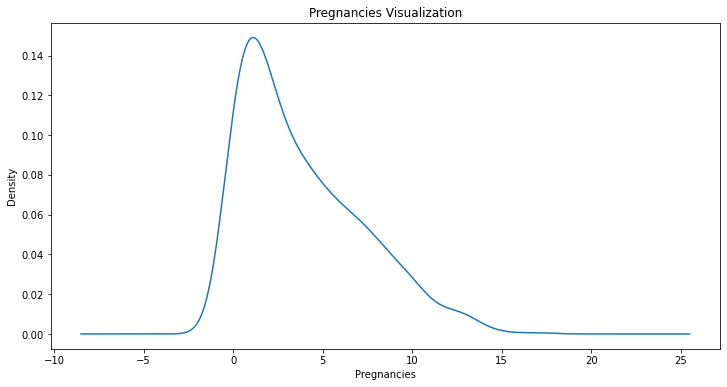

In [301]:
# Plot 'Pregnancies' feature dataset
plt.figure(figsize=(12,6))
p = plt.title('Pregnancies Visualization')
g = df['Pregnancies'].plot(kind='kde')
p = plt.xlabel('Pregnancies')

In [272]:
# Unique values count in 'Pregnancies' features
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

## Split the Dataset

In [273]:
#we want first X and Y to train and test the data 
#X means independent variable(because its not depending the other columns in data set)
#Y means dependent variable(beacuse its depending so many columns in data set)also called target

X = df.iloc[:,0:8].values # we are considering all columns are indepedent variable but not taking supervised columns
Y = df.iloc[:,-1].values  # its considering dependedt variable because of its target

In [274]:
#lets Import train_test_split to train and test our data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [275]:
X.shape,Y.shape

((768, 8), (768,))

In [276]:
# Handling imbalanced dataset using over sampling techniques with help of SMOTETomek library
smk = SMOTETomek(random_state=42)
X_train,Y_train=smk.fit_resample(X,Y)

In [277]:
X.shape,Y.shape

((768, 8), (768,))

In [278]:
X_train.shape,Y_train.shape

((952, 8), (952,))

In [279]:
# Befor and After Imablanced dataset of outcome features
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_train)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 476, 0: 476})


## Model Building 

In [280]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

    
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski',p =2)
knn.fit(X_train,Y_train)

from sklearn.svm import SVC
svc_lin = SVC(kernel='linear',random_state= 0)
svc_lin.fit(X_train,Y_train)
    
from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf',random_state= 0)
svc_rbf.fit(X_train,Y_train)

from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train,Y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
tree.fit(X_train,Y_train)
    
    
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =10, criterion='entropy',random_state = 0)
forest.fit(X_train,Y_train)
    
print("MACHINE LEARNING ALGORITHM APLLIED CHECK OUT ACCURACY")
print("")
print("[0] logistic regression Accuracy             :" ,log.score(X_train,Y_train))
print("")
print("[1]  K N N algorithm  Accuracy               :" ,knn.score(X_train,Y_train))
print("")
print("[2] Support Vector Machine(svc) Accuracy     :" ,svc_lin.score(X_train,Y_train))
print("")
print("[3] Support Vector Machine(rbf)  algorithm   :" ,svc_rbf.score(X_train,Y_train))
print("")
print("[4] Naive Bayes Accuracy Accuracy            :" ,gauss.score(X_train,Y_train))
print("")
print("[5] Desion Tree Algorithm Accuracy           :" ,tree.score(X_train,Y_train))
print("")
print("[6] Random Forest Accuracy                   :" ,forest.score(X_train,Y_train))
print("")

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MACHINE LEARNING ALGORITHM APLLIED CHECK OUT ACCURACY

[0] logistic regression Accuracy             : 0.7615546218487395

[1]  K N N algorithm  Accuracy               : 0.8403361344537815

[2] Support Vector Machine(svc) Accuracy     : 0.7657563025210085

[3] Support Vector Machine(rbf)  algorithm   : 0.7478991596638656

[4] Naive Bayes Accuracy Accuracy            : 0.7563025210084033

[5] Desion Tree Algorithm Accuracy           : 1.0

[6] Random Forest Accuracy                   : 0.990546218487395



**Note**:  Random Forest has contain Good Accuracy with help of  Random Forest lets predict with new data 

In [304]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [306]:
# Accuracy score for prediction data and test data
y_pred=forest.predict(X_test)
score=accuracy_score(Y_test,y_pred)
print('accuracy score:' ,score)
confusionmatrix = confusion_matrix(Y_test,y_pred)
print("-----------------")
print(confusionmatrix)

accuracy score: 0.961038961038961
-----------------
[[105   2]
 [  4  43]]


In [308]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.96      0.91      0.93        47

    accuracy                           0.96       154
   macro avg       0.96      0.95      0.95       154
weighted avg       0.96      0.96      0.96       154



/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

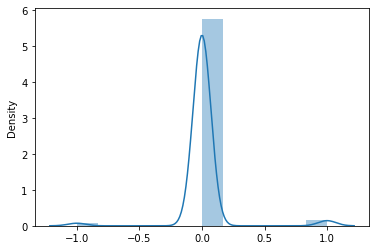

In [286]:
sns.distplot(Y_test-y_pred)

## Predictions

In [283]:

input_data = (1,3,2,5,0,55.6,0.234,10)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = forest.predict(input_data_reshaped)
print(prediction)

if (prediction!=0):
  print('Sorry you have Diabetes')
else:
  print("Hurry You don't have Diabetes")

[0]
Hurry You don't have Diabetes


In [284]:
input_data = (10,101,76,48,180,32.9,0.171,63)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = forest.predict(input_data_reshaped)
print(prediction)

if (prediction!=0):
  print('Sorry you have Diabetes')
else:
  print("Hurry You don't have Diabetes")

[0]
Hurry You don't have Diabetes


In [285]:
input_data = (6,148,72,35,0,33.6,0.627,50)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = forest.predict(input_data_reshaped)
print(prediction)

if (prediction!=0):
  print('Sorry you have Diabetes')
else:
  print("Hurry You don't have Diabetes")

[1]
Sorry you have Diabetes


In [309]:
# Extracting pkl file to deploy
import pickle
# open a file, where you ant to store the data
file = open('diabetes.pkl', 'wb')

# dump information to that file
pickle.dump(forest, file)